Ideas: does Hillary Clinton change that much? See how differently she corresponds with different people. Do regressions on sentiments to predict recipient of email, one logit for each frequent correspondent.

How her sentiments change in response to geopolitical events

How her sentiments change in response to public opinions

Her foreign policy hawkishness, Obama, and the Obama doctrine. How keen is she on change in the Middle East?

Carson says Trump is different behind the scenes than when he's campaigning. Is Clinton different behind the scenes than when campaigning? Is she different with her "inner circle" (which is hard to access)?

Who is Clinton's closest confidante? High networking score + emotion. Probably Sullivan or Abedin.

I could also just cluster the emails by sentiment and check characteristics of clusters.

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.stats import trim_mean

In [2]:
folder = '/Users/muneebalam/Desktop/Imperial/ML/project/output/'
folder2 = '/Users/muneebalam/Desktop/Imperial/ML/project/'
def read_cleaned_emails():
    return pd.read_csv(folder + 'emails cleaned.csv')
def read_wiki_emails():
    return pd.read_csv(folder2 + 'scraped-emails/emails/wikiemails.csv')
def read_speeches():
    return pd.read_csv(folder2 + 'speeches/speeches.csv')
df = read_wiki_emails()
df.drop('Unnamed: 0', axis=1, inplace=True)

df2 = read_speeches()
df2.drop('Unnamed: 0', axis=1, inplace=True)

Speech positive/negative

In [3]:
emots = ['disgust', 'anticipation', 'anger', 'surprise', 'joy', 'fear', 'trust', 
          'sadness', 'positive', 'negative']
for s in ['disgust', 'anticipation', 'anger', 'surprise', 'joy', 'fear', 'trust', 
          'sadness', 'positive', 'negative']:
    df[s + 'rate'] = 100*df[s]/df['wordcount']
    df2[s + 'rate'] = 100*df2[s]/df2['wordcount']

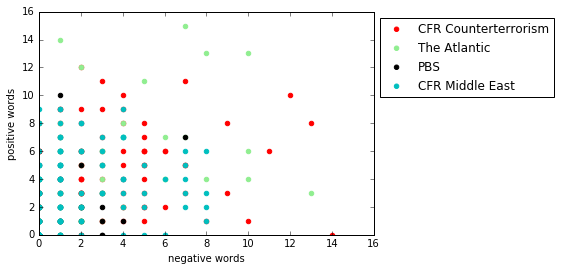

In [12]:
xvar = 'negative'
yvar = 'positive'
common_recips = {'CFR Counterterrorism': 'r', 'CFR Middle East': 'c', 
                 'The Atlantic': 'lightgreen',
                'PBS': 'k'}
for recip, col in common_recips.items():
    plt.scatter(df2[df2['Source'] == recip][xvar], 
                df2[df2['Source'] == recip][yvar], 
                color=col, label=recip)
plt.xlabel(xvar + ' words')
plt.ylabel(yvar + ' words')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend(loc=2, bbox_to_anchor=(1, 1), scatterpoints=1)

Scatter sentiments by email recipient

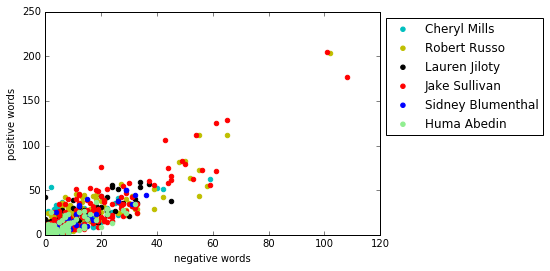

In [260]:
xvar = 'negative'
yvar = 'positive'
common_recips = {'Jake Sullivan': 'r', 'Cheryl Mills': 'c', 
                 'Huma Abedin': 'lightgreen', 'Sidney Blumenthal': 'b',
                'Lauren Jiloty': 'k', 'Robert Russo': 'y'}
for recip, col in common_recips.items():
    plt.scatter(df[df['Recipient'] == recip][xvar], 
                df[df['Recipient'] == recip][yvar], 
                color=col, label=recip)
plt.xlabel(xvar + ' words')
plt.ylabel(yvar + ' words')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend(loc=2, bbox_to_anchor=(1, 1), scatterpoints=1)

Who receives the most emotion per email from HRC?

In [128]:
common_recipients = {'Jake Sullivan', 'Cheryl Mills', 'Huma Abedin', 'Lauren Jiloty',
                    'Robert Russo', 'Lona Valmoro', 'Monica Hanley', 'Philippe Reines',
                    'Sidney Blumenthal', 'Anne-Marie Slaughter', 'Melanne Verveer'}
avg_by_emot = {}
emots = {'anger', 'trust', 'joy', 'anticipation', 'sadness', 'surprise', 'disgust', 'fear',
        'positive', 'negative'}
for r in common_recipients:
    avg_by_emot[r] = {}
    temp = df[(df['Sender'] == 'Hillary Clinton') & (df['Recipient'] == r)]
    for e in emots:
        avg_by_emot[r][e] = 100*sum(temp[e])/sum(temp['wordcount'])

In [25]:
for emot in emots:
    ys = []
    vals = []
    names = []
    for i, r in enumerate(common_recipients):
        ys.append(i)
        names.append(r)
        vals.append(avg_by_emot[r][emot])
    plt.barh(ys, vals)
    plt.yticks([y+0.4 for y in ys], names)
    plt.xlabel(emot[0].upper() + emot[1:] + ' words per 100 words')
    plt.title('Sentiments in emails sent by HRC')
    plt.ylabel('Recipient')
    plt.ylim(top=len(common_recipients))
    plt.tight_layout()
    plt.savefig(folder2 + emot + '.png')
    plt.clf()

In [29]:
ravg_by_emot = {}
for r in common_recipients:
    ravg_by_emot[r] = {}
    temp = df[(df['Recipient'] == 'Hillary Clinton') & (df['Sender'] == r)]
    for e in emots:
        ravg_by_emot[r][e] = 100*sum(temp[e])/sum(temp['wordcount'])

In [30]:
for emot in emots:
    ys = []
    vals = []
    names = []
    for i, r in enumerate(common_recipients):
        ys.append(i)
        names.append(r)
        vals.append(ravg_by_emot[r][emot])
    plt.barh(ys, vals)
    plt.yticks([y+0.4 for y in ys], names)
    plt.xlabel(emot[0].upper() + emot[1:] + ' words per 100 words')
    plt.title('Sentiments in emails received by HRC')
    plt.ylabel('Sender')
    plt.ylim(top=len(common_recipients))
    plt.tight_layout()
    plt.savefig(folder2 + emot + ' received.png')
    plt.clf()

In [133]:
print('Send avgs')
print(*tuple([(emot+' ')[:4] for emot in emots]))
for name in avg_by_emot:
    print(' '.join([str(avg)[:4] for e, avg in avg_by_emot[name].items()]), 'to', name)

Send avgs
anti posi ange fear surp joy  nega sadn trus disg
2.73 0.72 2.07 1.06 1.68 0.73 4.68 0.49 0.83 1.53 to Melanne Verveer
1.15 0.51 1.85 0.24 0.64 0.48 2.14 0.11 0.13 0.62 to Lona Valmoro
2.60 0.74 1.61 0.99 2.14 0.68 4.34 0.50 0.70 1.35 to Philippe Reines
3.00 0.89 2.23 1.04 1.96 0.74 5.18 0.56 1.04 1.36 to Anne-Marie Slaughter
2.17 0.66 1.48 0.88 1.65 0.65 3.29 0.38 0.67 0.86 to Cheryl Mills
2.57 0.67 1.75 1.35 2.19 0.76 4.13 0.48 0.92 1.00 to Monica Hanley
2.96 0.82 1.86 1.60 2.42 0.96 4.73 0.60 1.21 1.18 to Robert Russo
3.01 0.96 1.93 2.04 2.93 1.16 4.87 0.77 1.52 1.34 to Lauren Jiloty
3.47 1.12 2.28 2.61 3.49 1.29 5.71 0.89 1.88 1.51 to Sidney Blumenthal
1.81 0.75 1.55 1.30 2.22 0.81 3.21 0.51 1.01 0.70 to Huma Abedin
2.72 0.62 1.53 1.77 2.39 0.87 4.01 0.49 1.20 0.77 to Jake Sullivan


0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4


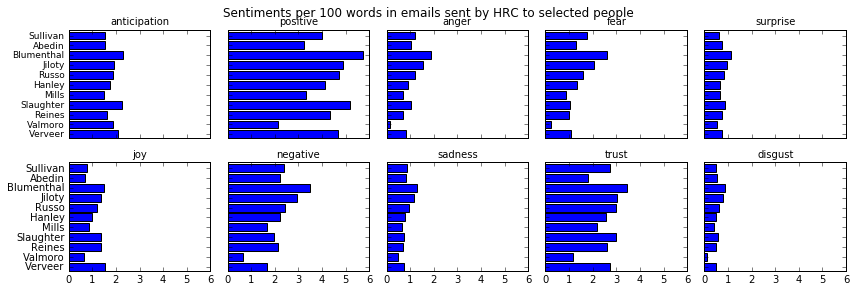

In [289]:
plt.clf()
def_figsize = plt.rcParams["figure.figsize"]

plt.rcParams["figure.figsize"] = (12, 4)
fig, axes = plt.subplots(2, 5, sharey=True, sharex=True)
ylab = [name.split(' ')[1] for name in avg_by_emot]
ys = [i for i in range(len(avg_by_emot))]
ys2 = [y + 0.4 for y in ys]
for i, e in enumerate(emots):
    ws = [avg_by_emot[n][e] for n in avg_by_emot]
    axes[i//5, i%5].barh(ys, ws)
    axes[i//5, i%5].set_title(e, size=10)
    print(i//5, i%5)
axes[0, 0].set_yticks(ys2)
axes[0, 0].set_yticklabels(ylab, fontsize=9, va='center')
axes[0, 0].set_ylim(0, len(ys))
fig.suptitle('Sentiments per 100 words in emails sent by HRC to selected people', y=1.0,
            fontsize=12, va='top')
plt.tight_layout()
plt.savefig(folder2 + 'attr.png')

In [ ]:
plt.rcParams["figure.figsize"] = def_figsize

In [37]:
print('Receive avgs')
for name in ravg_by_emot:
    print(' '.join([str(avg)[:4] for e, avg in ravg_by_emot[name].items()]), 'to', name)

Receive avgs
1.07 0.98 0.69 0.61 0.37 0.57 1.43 2.57 1.58 0.47 to Jake Sullivan
1.58 1.36 1.08 1.08 0.59 0.85 2.16 3.94 2.25 0.68 to Anne-Marie Slaughter
1.22 1.46 0.99 0.64 0.41 0.79 1.86 2.60 1.76 0.59 to Huma Abedin
0.38 0.24 0.16 0.20 0.12 0.20 0.43 0.85 0.46 0.14 to Lauren Jiloty
1.36 1.04 0.79 0.98 0.42 0.72 1.67 3.24 1.96 0.63 to Philippe Reines
1.40 1.80 1.21 0.94 0.64 0.97 2.44 3.55 2.33 0.72 to Sidney Blumenthal
0.92 0.53 0.40 0.35 0.21 0.41 0.89 1.69 1.03 0.40 to Monica Hanley
1.39 0.48 0.36 0.77 0.17 0.44 0.76 2.62 1.47 0.57 to Robert Russo
1.64 0.70 0.50 1.37 0.36 0.59 1.10 3.50 1.96 0.83 to Melanne Verveer
1.00 0.10 0.05 0.38 0.04 0.17 0.20 1.08 0.53 0.29 to Lona Valmoro
1.20 0.88 0.62 0.73 0.35 0.58 1.39 2.78 1.68 0.52 to Cheryl Mills


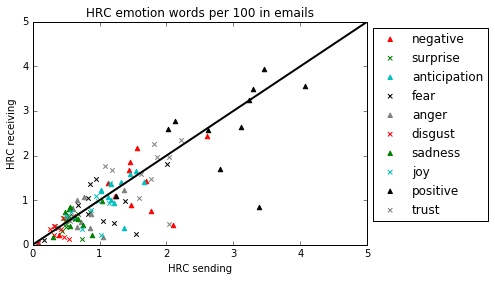

In [49]:
colorcycle = ['r', 'g', 'c', 'k', 'gray'] * 2
markers = ['^', 'x'] * 5
for i, emot in enumerate(emots):
    xs = []
    ys = []
    for j, name in enumerate(avg_by_emot):
        xs.append(avg_by_emot[name][emot])
        ys.append(ravg_by_emot[name][emot])
    plt.scatter(xs, ys, color=colorcycle[i], marker=markers[i], label=emot)
plt.legend(loc=2, bbox_to_anchor=(1, 1), scatterpoints=1)
plt.xlabel('HRC sending')
plt.ylabel('HRC receiving')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.plot([0, 5], [0, 5], lw=2, color='k')
plt.title('HRC emotion words per 100 in emails')

See whether emotion/100 words per recipient in one half of emails is reflective of emotion/100 in the other.

In [15]:
common_recipients = {'Jake Sullivan', 'Cheryl Mills', 'Huma Abedin', 'Lauren Jiloty',
                    'Robert Russo', 'Lona Valmoro', 'Monica Hanley', 'Philippe Reines',
                    'Sidney Blumenthal', 'Anne-Marie Slaughter', 'Melanne Verveer'}
avg_by_emot1 = {}
avg_by_emot2 = {}
emots = {'anger', 'trust', 'joy', 'anticipation', 'sadness', 'surprise', 'disgust', 'fear',
        'positive', 'negative'}
for r in common_recipients:
    avg_by_emot1[r] = {}
    avg_by_emot2[r] = {}
    
    temp = df[(df['Sender'] == 'Hillary Clinton') & (df['Recipient'] == r)]
    splithalves = [round(random.random()) for x in range(len(temp))]
    temp['Half'] = splithalves
    half1 = temp[temp['Half'] == 0]
    half2 = temp[temp['Half'] == 1]
    
    for e in emots:
        avg_by_emot1[r][e] = 100*sum(half1[e])/sum(half1['wordcount'])
    for e in emots:
        avg_by_emot2[r][e] = 100*sum(half2[e])/sum(half2['wordcount'])

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
import scipy.stats as ss
for e in emots:
    xs = [] #half1
    ys = [] #half2
    for r in common_recipients:
        xs.append(avg_by_emot1[r][e])
        ys.append(avg_by_emot2[r][e])
    m, b, r, p, err = ss.linregress(xs, ys)
    print(e, m, b, r, p, err)

surprise 0.807505154344 0.280551131531 0.488109651448 0.127703039893 0.481296374924
negative 1.00252350522 -0.137750977998 0.855129222318 0.000792907548432 0.202590483242
joy 1.25724797875 -0.155809130751 0.908137375939 0.000110513349791 0.193206789468
anger 1.07019219107 -0.15633315567 0.939043014188 1.82674212657e-05 0.130605209572
positive 1.05232415462 -0.150841788803 0.923889764932 4.8517170887e-05 0.145284656939
fear 0.868034742435 0.101005840885 0.891013959096 0.000232486353254 0.147422628649
anticipation 0.84835714332 0.422428786283 0.620901641131 0.0414827484488 0.357017037334
disgust 0.631934524505 0.192305904172 0.525357453195 0.0969981374941 0.341165476502
sadness 1.04111816563 -0.0179208025364 0.690696434572 0.018616183937 0.363343032767
trust 0.911691704853 0.169958900047 0.861766195857 0.000648528797103 0.178898621689


In [19]:
xs = [] #half1
ys = [] #half2
for e in emots:
    for r in common_recipients:
        xs.append(avg_by_emot1[r][e])
        ys.append(avg_by_emot2[r][e])
m, b, r, p, err = ss.linregress(xs, ys)
print(e, m, b, r, p, err)

trust 0.991964899716 0.0271839424212 0.968287489296 7.00149344509e-67 0.0246285977809


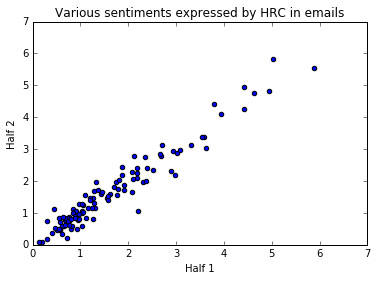

In [25]:
plt.scatter(xs, ys)
plt.xlabel('Half 1')
plt.ylabel('Half 2')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title('Various sentiments expressed by HRC in emails')

In [22]:
print(np.mean(xs), np.mean(ys))
print(np.std(xs), np.std(ys))

1.63942868452 1.65343965305
1.17635680326 1.20512210607


SVM classifier for confidants vs not. Train on <= 5 emails received as acquaintance, Sullivan, Mills, Abedin, Reines, Blumenthal, and Williams as confidants.


In [457]:
confidants = {'Jake Sullivan', 'Cheryl Mills', 'Huma Abedin', 'Philippe Reines', 'Sidney Blumenthal', 'Maggie Williams'}
#confidants = {'Sidney Blumenthal'}
acq_lim = 20

n = 0
for c in confidants:
    n += len(df[(df['Sender'] == 'Hillary Clinton') & (df['Recipient'] == c)])

vc = df[df['Sender'] == 'Hillary Clinton']['Recipient'].value_counts()
kv = [(k, v) for k, v in zip(vc.keys(), vc)]
n = 0
acq = set()
for k, v in kv:
    if v <= acq_lim:
        n += v
        acq.add(k)
print(n)

553


Logistic regression predicting probability email comes from confidant. Predictors: df['wordcount'], the 10 sentiments per 100 words, time of day.

In [458]:
def acq_or_conf(s):
    return s in acq or s in confidants
def acquaintance(s):
    return (s in acq)
def conf(s):
    return (s in confidants)
def get_min_of_day(s):
    s2 = s.split(':')
    hour = int(s2[0][-2:])
    minute = int(s2[1])
    return 60*hour + minute
def train_or_test(s):
    return int(random.random()+0.5)
df['Acq'] = df['Recipient'].apply(acquaintance)
df['Conf'] = df['Recipient'].apply(conf)
df['TrainAcqConf'] = df['Recipient'].apply(acq_or_conf)
df['MinOfDay'] = df['Sent'].apply(get_min_of_day)
df['trainingdata'] = df['Sent'].apply(train_or_test)
training = df[(df['Sender'] == 'Hillary Clinton') & (df['TrainAcqConf'] == True) 
              & (df['trainingdata'] == 1)]
test = df[(df['Sender'] == 'Hillary Clinton') & (df['TrainAcqConf'] == True) 
              & (df['trainingdata'] == 0)]
newsample = df[(df['Sender'] == 'Hillary Clinton') & (df['TrainAcqConf'] == False)]

In [459]:
labs = ['wordcount', 'minofday']
X = [[x for x in np.log(training['wordcount'])], [x for x in training['MinOfDay']]]
for e in emots:
    X.append([x for x in training[e + 'rate']])
    labs.append(e)
y = np.array([1 if x else 0 for x in training['Conf']])
labs.append('confidant')
"""
w = open(folder2 + 'conf classifier.csv', 'w')
w.write(','.join(labs) + ',confidant')
for i in range(len(X[0])):
    w.write('\n')
    for j in range(len(X)):
        w.write(str(X[j][i]) + ',')
    w.write(str(y[i]))
w.close()
"""
X = np.array(X).T

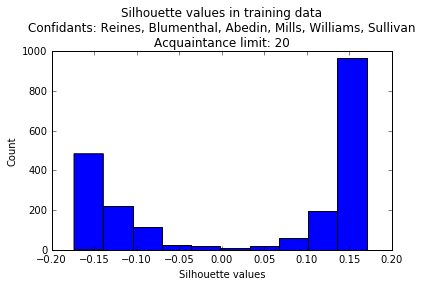

In [460]:
silh = silhouette_score(X, y)
silh_all = silhouette_samples(X, y)
plt.hist(silh_all)
cs = [s.split(' ')[1] for s in confidants]
plt.title('Silhouette values in training data\nConfidants: {0:s}\nAcquaintance limit: {1:d}'.format(
        ', '.join(cs), acq_lim))
plt.xlabel('Silhouette values')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(folder2 + 'silh1.png')

In [462]:
clf = SVC()
#clf = RandomForestClassifier()
#clf = LogisticRegression()
clf.fit(X, y)

X2 = [[x for x in np.log(test['wordcount'])], [x for x in test['MinOfDay']]]
for e in emots:
    X2.append([x for x in test[e + 'rate']])
y2 = np.array([1 if x else 0 for x in test['Conf']])
X2 = np.array(X2).T

X3 = [[x for x in np.log(newsample['wordcount'])], [x for x in newsample['MinOfDay']]]
for e in emots:
    X3.append([x for x in newsample[e + 'rate']])
y3 = np.array([1 if x else 0 for x in newsample['Conf']])
X3 = np.array(X3).T

p = clf.predict(X)
p2 = clf.predict(X2)
p3 = clf.predict(X3)

tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(y)):
    if p[i] >= 0.5:
        if y[i] == 1:
            tp += 1
        else:
            fp += 1
    else:
        if y[i] == 1:
            fn += 1
        else:
            tn += 1
print('Training')
print('True positives', tp, 100*tp/len([yi for yi in y if yi == 1]))
print('False positives', fp, 100*fp/len([yi for yi in y if yi == 0]))
print('True negatives', tn, 100*tn/len([yi for yi in y if yi == 0]))
print('False negatives', fn, 100*fn/len([yi for yi in y if yi == 1]))

tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(y2)):
    if p2[i] >= 0.5:
        if y2[i] == 1:
            tp += 1
        else:
            fp += 1
    else:
        if y2[i] == 1:
            fn += 1
        else:
            tn += 1
print('Test')
print('True positives', tp, 100*tp/len([yi for yi in y2 if yi == 1]))
print('False positives', fp, 100*fp/len([yi for yi in y2 if yi == 0]))
print('True negatives', tn, 100*tn/len([yi for yi in y2 if yi == 0]))
print('False negatives', fn, 100*fn/len([yi for yi in y2 if yi == 1]))

pos = 0
neg = 0
for i in range(len(y3)):
    if p3[i] >= 0.5:
        pos += 1
    else:
        neg += 1
print('New data')
print('Positives', pos, 100*pos/len(p3))
print('Negatives', neg, 100*neg/len(p3))

Training
True positives 1839 100.0
False positives 108 40.6015037593985
True negatives 158 59.3984962406015
False negatives 0 0.0
Test
True positives 1888 99.78858350951374
False positives 275 97.51773049645391
True negatives 7 2.482269503546099
False negatives 4 0.21141649048625794
New data
Positives 3278 99.66555183946488
Negatives 11 0.33444816053511706


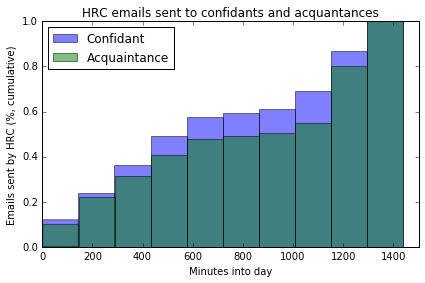

In [54]:
def get_min_of_day(s):
    s2 = s.split(':')
    hour = int(s2[0][-2:])
    minute = int(s2[1])
    return 60*hour + minute
plt.hist(training[training['Conf'] == True]['Sent'].apply(get_min_of_day), alpha=0.5, 
         label='Confidant', normed=True, cumulative=True)
plt.hist(training[training['Acq'] == True]['Sent'].apply(get_min_of_day), alpha=0.5, 
         label='Acquaintance', normed=True, cumulative=True)
plt.xlim(0, 25*60)
plt.xlabel('Minutes into day')
plt.ylabel('Emails sent by HRC (%, cumulative)')
plt.title('HRC emails sent to confidants and acquantances')
plt.legend(loc=2)
plt.tight_layout()
plt.savefig(folder2 + 'by time of day.png')

In [115]:
clf.score(X, y)

0.96845057256368305

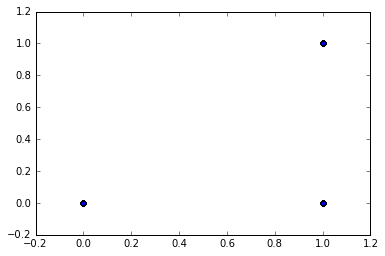

In [118]:
plt.scatter(p, y)

(array([  413.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3866.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

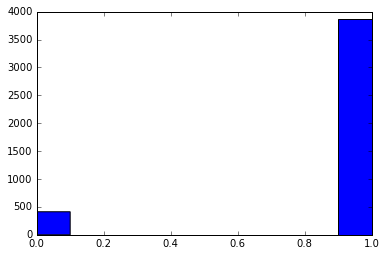

In [117]:
plt.hist(p)

In [73]:
len(X)

12

In [111]:
len(X)

4279

In [79]:
len(X[0])

4279

In [136]:
np.log(10)

2.3025850929940459

In [160]:
df['trainingdata'].value_counts()

1    15183
0    15138
Name: trainingdata, dtype: int64

In [202]:
vc = df[(df['Sender'] == 'Hillary Clinton') & (df['TrainAcqConf'] == False)]['Recipient'].value_counts()
keys = [k for k in vc.keys()]
n = sum(vc)
cumul = 0
for k, v in zip(keys, vc):
    cumul += v
    print(k, v, 100*cumul/n)

Lauren Jiloty 717 27.7262180974
Robert Russo 522 47.9118329466
Monica Hanley 438 64.849187935
Lona Valmoro 434 81.6318638824
Melanne Verveer 114 86.0402165507
Anne-Marie Slaughter 112 90.3712296984
Richard Verma 76 93.3101314772
Judith McHale 62 95.7076566125
Kurt Campbell 57 97.9118329466
Lissa Muscatine 54 100.0


In [290]:
df.head()

,Sent,Released,Sender,Recipient,Subject,Text,surprise,sadness,anger,fear,...,fearrate,trustrate,sadnessrate,positiverate,negativerate,TrainAcqConf,Acq,Conf,MinOfDay,trainingdata
0,2010-06-30 06:53:00,2015-08-31 00:00:00,Hillary Clinton,Philippe Reines,TEST,Received.,0,0,0,0,...,0,0,0,0,0,True,False,True,413,0
1,2010-06-17 00:57:00,2015-08-31 00:00:00,Hillary Clinton,Richard Verma,AIPAC?,What happened?,0,0,0,0,...,0,0,0,0,0,False,False,False,57,0
2,2010-06-15 19:30:00,2015-08-31 00:00:00,Hillary Clinton,Lauren Jiloty,"H: MEMO ON URGENT KYRGYZSTAN CRISIS, FIRST HAN...",PIs make 3 copies.,0,0,0,0,...,0,0,0,0,0,False,False,False,1170,1
3,2010-06-27 10:09:00,2015-08-31 00:00:00,Hillary Clinton,Cheryl Mills,ARE YOU STILL UP?,Yes--call me.,0,0,0,0,...,0,0,0,0,0,True,False,True,609,0
4,2010-06-30 06:25:00,2015-08-31 00:00:00,Hillary Clinton,Jake Sullivan,BOMB AT SUFI SHRINE,Can you get me more info about the shrine?,0,0,0,0,...,0,0,0,0,0,True,False,True,385,1


In [340]:
bins = [i for i in range(0, 201, 10)]
plt.hist(df[df['Sender'] == 'Hillary Clinton']['wordcount'], alpha=0.5, label='Emails', 
         bins=bins)
plt.hist(df2['wordcount'], alpha=0.5, label='Speech', bins=bins)
#ys = [y for y in np.arange(0, 0.046, 0.005)]
#yt = [int(y*1000) for y in ys]
#plt.yticks(ys, yt)
plt.legend(loc=1, fontsize=14)
plt.title('Distribution of HRC email and\nspeech paragraph word counts', fontsize=16)
plt.ylabel('Observations', fontsize=14)
plt.xlabel('Word count', fontsize=14)
plt.tight_layout()
plt.savefig(folder2 + 'word counts.png')

7573

In [4]:
cols_needed = ['surprise', 'sadness', 'anger', 'joy', 'disgust', 
               'trust', 'fear', 'anticipation', 'positive', 'negative', 'wordcount']
cols_needed += [c+'rate' for c in cols_needed.copy()[:-1]]
cols_needed = {c: [] for c in cols_needed}
source = [x for x in df2['Source']]
source += [x for x in df[df['Sender'] == 'Hillary Clinton']['Sender']]
for c in cols_needed:
    cols_needed[c] += [x for x in df2[c]]
    cols_needed[c] += [x for x in df[df['Sender'] == 'Hillary Clinton'][c]]

In [5]:
corder = [c for c in cols_needed]
cvals = [source] + [cols_needed[c] for c in corder]
corder = ['Source'] + corder
cvals = np.array(cvals).T
df3 = pd.DataFrame.from_records(cvals)
df3.columns = corder
for c in corder:
    if not c == 'Source':
        if c[-4:] == 'rate':
            df3[c] = df[c].astype(float).fillna(0.0)
        else:
            df3[c] = df[c].astype(int).fillna(0)

In [22]:
def train_or_test(s):
    return int(random.random()+0.5)
def from_email(s):
    if s == 'Hillary Clinton':
        return 1
    return 0
df3['trainingdata'] = df3['Source'].apply(train_or_test)
df3['Email'] = df3['Source'].apply(from_email)
training = df3[df3['trainingdata'] == 1]
test = df3[df3['trainingdata'] == 0]

labs = ['wordcount']
X = [[np.log(int(x)) for x in training['wordcount']]]
for e in emots:
    X.append([x for x in training[e + 'rate']])
    labs.append(e)
y = np.array([x for x in training['Email']])
labs.append('Email')
X = np.array(X).T

X2 = [[np.log(int(x)) for x in test['wordcount']]]
for e in emots:
    X2.append([x for x in test[e + 'rate']])
y2 = np.array([x for x in test['Email']])
X2 = np.array(X2).T

In [35]:
#clf = SVC()
#clf = RandomForestClassifier()
clf = LogisticRegression()
X_red = X[:, [0, 1, 4, 6]]
X_red2 = X2[:, [0, 1, 4, 6]]
clf.fit(X, y)

p = [x for x in clf.predict(X)]
p2 = [x for x in clf.predict(X2)]

tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(y)):
    if p[i] >= 0.5:
        if y[i] == 1:
            tp += 1
        else:
            fp += 1
    else:
        if y[i] == 1:
            fn += 1
        else:
            tn += 1
print('Training')
print('True positives', tp, 100*tp/len([yi for yi in y if yi == 1]))
print('False positives', fp, 100*fp/len([yi for yi in y if yi == 0]))
print('True negatives', tn, 100*tn/len([yi for yi in y if yi == 0]))
print('False negatives', fn, 100*fn/len([yi for yi in y if yi == 1]))

tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(y2)):
    if p2[i] >= 0.5:
        if y2[i] == 1:
            tp += 1
        else:
            fp += 1
    else:
        if y2[i] == 1:
            fn += 1
        else:
            tn += 1
print('Test')
print('True positives', tp, 100*tp/len([yi for yi in y2 if yi == 1]))
print('False positives', fp, 100*fp/len([yi for yi in y2 if yi == 0]))
print('True negatives', tn, 100*tn/len([yi for yi in y2 if yi == 0]))
print('False negatives', fn, 100*fn/len([yi for yi in y2 if yi == 1]))

Training
True positives 3773 100.0
False positives 177 100.0
True negatives 0 0.0
False negatives 0 0.0
Test
True positives 3794 99.97364953886694
False positives 179 100.0
True negatives 0 0.0
False negatives 1 0.026350461133069828


In [476]:
df3.columns

Index(['Source', 'positiverate', 'anticipation', 'negativerate', 'trustrate',
       'anticipationrate', 'positive', 'angerrate', 'anger', 'surpriserate',
       'wordcount', 'joyrate', 'sadness', 'disgustrate', 'surprise', 'joy',
       'sadnessrate', 'negative', 'trust', 'fear', 'fearrate', 'disgust',
       'trainingdata', 'Email'],
      dtype='object')

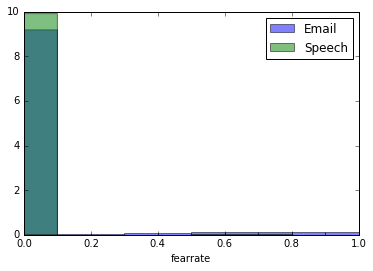

In [477]:
c = 'fearrate'
bins = np.arange(0, 1.1, 0.1)
plt.hist(df3[df3['Source'] == 'Hillary Clinton'][c], label='Email', alpha=0.5, normed=True, bins=bins)
plt.hist(df3[df3['Source'] != 'Hillary Clinton'][c], label='Speech', alpha=0.5, normed=True, bins=bins)
plt.legend(loc=1)
plt.xlim(0, 1)
plt.xlabel(c)

In [436]:
len(df3)

7924

In [14]:
xs = ['wordcount'] + [e + 'rate' for e in emots] 
for x, a in zip(xs, clf.coef_[0]):
    print(x, a)
print('intercept', clf.intercept_[0])

wordcount 0.317943030404
disgustrate 0.045262775956
anticipationrate -0.00723403024597
angerrate 0.0375522997735
surpriserate -0.0699667267455
joyrate -0.0290248004804
fearrate -0.109637831713
trustrate 0.0266195225199
sadnessrate 0.0557052999408
positiverate 0.0170429289405
negativerate 0.065170844239
intercept 2.08145896146


(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   3.20000000e+01,
          2.08300000e+03,   1.74500000e+03,   4.20000000e+01,
          7.00000000e+00]),
 array([-6.44748647, -5.04790701, -3.64832755, -2.2487481 , -0.84916864,
         0.55041082,  1.94999028,  3.34956974,  4.74914919,  6.14872865,
         7.54830811]),
 <a list of 10 Patch objects>)

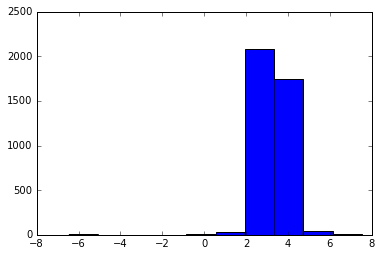

In [447]:
plt.hist(clf.decision_function(X2))

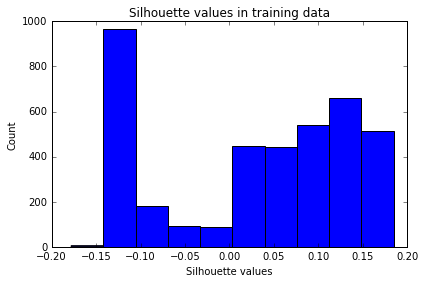

In [473]:
silh = silhouette_score(X, y)
silh_all = silhouette_samples(X, y)
plt.hist(silh_all)
plt.title('Silhouette values in training data')
plt.xlabel('Silhouette values')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(folder2 + 'silh em sp1.png')

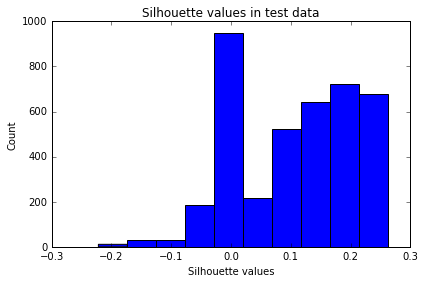

In [474]:
silh = silhouette_score(X2, y2)
silh_all = silhouette_samples(X2, y2)
plt.hist(silh_all)
plt.title('Silhouette values in test data')
plt.xlabel('Silhouette values')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(folder2 + 'silh em sp2.png')

In [475]:
em = df3[df3['Source'] == 'Hillary Clinton']
sp = df3[df3['Source'] != 'Hillary Clinton']
for c in df3.columns:
    print(c, min(em[c]), max(em[c]), min(sp[c]), max(sp[c]))

Source Hillary Clinton Hillary Clinton CFR Counterterrorism The Atlantic
positiverate 0.0 100.0 0.0 50.0
anticipation 0 43 0 10
negativerate 0.0 100.0 0.0 20.0
trustrate 0.0 100.0 0.0 50.0
anticipationrate 0.0 100.0 0.0 50.0
positive 0 105 0 32
angerrate 0.0 25.0 0.0 11.1111111111
anger 0 29 0 29
surpriserate 0.0 50.0 0.0 50.0
wordcount 1 3745 1 1623
joyrate 0.0 100.0 0.0 50.0
sadness 0 25 0 15
disgustrate 0.0 22.2222222222 0.0 20.0
surprise 0 22 0 9
joy 0 30 0 7
sadnessrate 0.0 50.0 0.0 16.6666666667
negative 0 48 0 35
trust 0 84 0 20
fear 0 32 0 24
fearrate 0.0 50.0 0.0 14.2857142857
disgust 0 18 0 10
trainingdata 0 1 0 1
Email 1 1 0 0


In [13]:
w = open(folder2 + 'train.csv', 'w')
w.write('Source,{0:s}'.format(','.join(labs[:-1])))
for i in range(len(X)):
    w.write('\n{0:d}'.format(y[i]))
    for j in range(len(X[i])):
        w.write(','+str(X[i][j]))
w.close()

In [12]:
labs

['wordcount',
 'disgust',
 'anticipation',
 'anger',
 'surprise',
 'joy',
 'fear',
 'trust',
 'sadness',
 'positive',
 'negative',
 'Email']

In [31]:
len(df2)

356

In [33]:
1888/(1887+257+4)

0.8789571694599627

In [42]:
len(df['Recipient'].value_counts())

319

In [44]:
np.std(df['wordcount'])

343.73239306225059

In [45]:
max(df['wordcount'])

28409

(array([  3.02820000e+04,   3.20000000e+01,   4.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  1.00000000e+00,   2.84180000e+03,   5.68260000e+03,
          8.52340000e+03,   1.13642000e+04,   1.42050000e+04,
          1.70458000e+04,   1.98866000e+04,   2.27274000e+04,
          2.55682000e+04,   2.84090000e+04]),
 <a list of 10 Patch objects>)

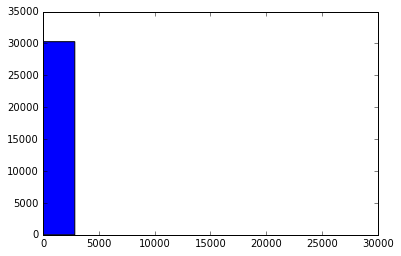

In [47]:
plt.hist(df['wordcount'])

In [48]:
wc = [x for x in df['wordcount']]
wc.sort(reverse=True)

In [49]:
wc[:10]

[28409, 28086, 18323, 7108, 6118, 5911, 5830, 5515, 5351, 5225]

In [50]:
wc[:100]

[28409,
 28086,
 18323,
 7108,
 6118,
 5911,
 5830,
 5515,
 5351,
 5225,
 5047,
 5040,
 4812,
 4141,
 4042,
 3968,
 3854,
 3822,
 3818,
 3745,
 3722,
 3611,
 3529,
 3507,
 3450,
 3439,
 3422,
 3195,
 3183,
 3158,
 3130,
 3101,
 3091,
 3087,
 2958,
 2951,
 2935,
 2902,
 2857,
 2841,
 2813,
 2755,
 2722,
 2708,
 2621,
 2606,
 2599,
 2595,
 2588,
 2586,
 2561,
 2537,
 2489,
 2485,
 2451,
 2431,
 2406,
 2366,
 2352,
 2342,
 2331,
 2298,
 2285,
 2264,
 2261,
 2260,
 2240,
 2236,
 2223,
 2212,
 2193,
 2166,
 2123,
 2096,
 2095,
 2089,
 2085,
 2083,
 2068,
 2063,
 2062,
 2044,
 2035,
 2015,
 2006,
 1988,
 1974,
 1969,
 1967,
 1940,
 1940,
 1934,
 1918,
 1914,
 1908,
 1902,
 1895,
 1891,
 1883,
 1881]